In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.]) # Dosage of drug for treating Alzheimer's disease
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [5]:
y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2) # Patient's "forgetfulness score"
y

tensor([ 1.8200,  1.7424,  1.1111,  0.8063, -0.0762, -0.7182, -1.0179, -1.5663])

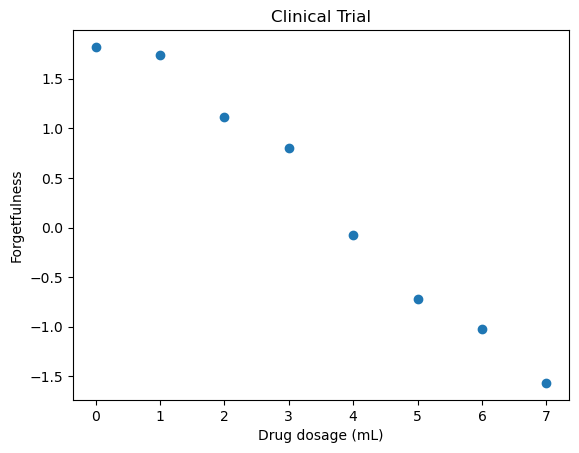

In [6]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x, y)

In [7]:
m = torch.tensor([0.9]).requires_grad_() # Slope of the line
m

tensor([0.9000], requires_grad=True)

In [8]:
b = torch.tensor([0.1]).requires_grad_()
b # -intercept parameter of the line

tensor([0.1000], requires_grad=True)

In [9]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [10]:
def regression_plot(my_x, my_y, my_m, my_b):
    
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

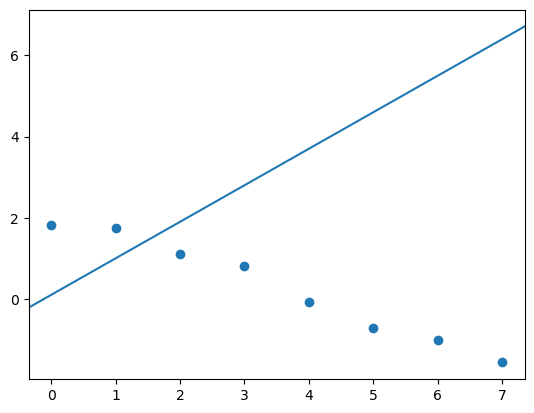

In [11]:
regression_plot(x, y, m, b)

In [12]:
def loss_function(y_pred, y_true):
    return ((y_pred - y_true)**2).mean()

In [13]:
learning_rate = 0.01
for epoch in range(1000):  # number of iterations
    y_pred = regression(x, m, b)
    loss = loss_function(y_pred, y)
    
    loss.backward()  # Compute gradients
    
    with torch.no_grad():
        m -= learning_rate * m.grad
        b -= learning_rate * b.grad
        
        m.grad.zero_()
        b.grad.zero_()


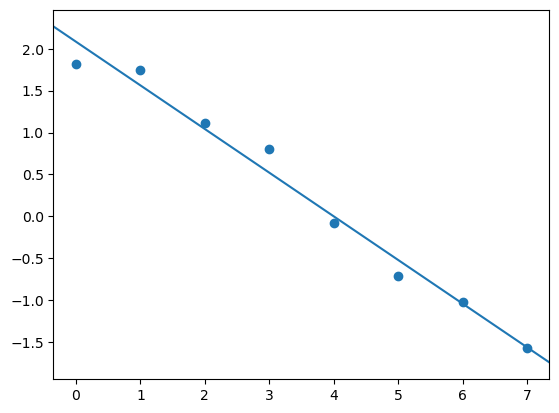

In [14]:
regression_plot(x, y, m, b)

Epoch [100/1000], Loss: 0.0745
Epoch [200/1000], Loss: 0.0378
Epoch [300/1000], Loss: 0.0192
Epoch [400/1000], Loss: 0.0098
Epoch [500/1000], Loss: 0.0050
Epoch [600/1000], Loss: 0.0025
Epoch [700/1000], Loss: 0.0013
Epoch [800/1000], Loss: 0.0006
Epoch [900/1000], Loss: 0.0003
Epoch [1000/1000], Loss: 0.0002


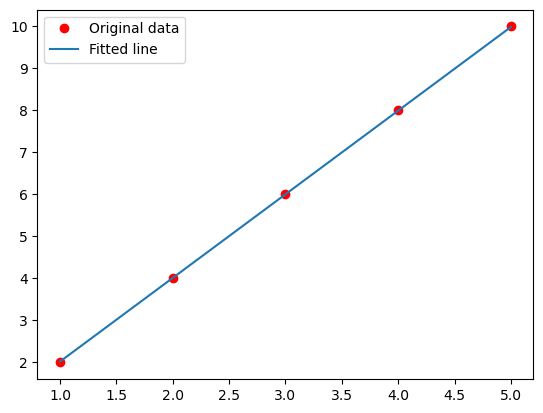

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate synthetic data
x = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
y = torch.tensor([2.0, 4.0, 6.0, 8.0, 10.0])

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# Define the built-in MSE loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(x.view(-1, 1))
    loss = criterion(outputs, y.view(-1, 1))
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    predicted = model(x.view(-1, 1)).detach().numpy()

# Plotting the results
plt.plot(x.numpy(), y.numpy(), 'ro', label='Original data')
plt.plot(x.numpy(), predicted, label='Fitted line')
plt.legend()
plt.show()
